#melt()

### Long Vs Wide Data
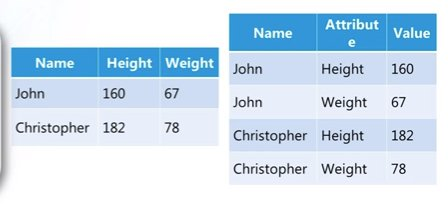

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [ ]:
'''
in other words:-
wide:- each attribute having its own column and most importantly, we have only 1 datapoint in 1 row. a datapoint does not span accross different datapoints.
long:- here, a datapoint might span accross more than one row, depending upon attributes it has. for eg:- here, when you see the long format (right), you can see that
each datapoint has 2 attributes, height and weight. hence, each datapoint spanning accross 2 rows each.

WIDE ----> LONG  , we use melt()
'''

In [ ]:
import pandas as pd

In [ ]:
#before melt()
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]})

,cse,ece,mech
0,120,100,50


In [ ]:
#each attribute became an individual row and got its corresponding value right next to it.
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt()

,variable,value
0,cse,120
1,ece,100
2,mech,50


In [ ]:
#renaming the columns after melt():-
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch', value_name='students')

,branch,students
0,cse,120
1,ece,100
2,mech,50


#Why to use melt() in the first place?

In [ ]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229


In [ ]:
'''
above we can see that there are unnecessary columns of each date. like 1081 columns being too much. here, we use melt to have all the
dates in a single column. say, we were to find how many confirmed cases in each country on each day. here,  we can convert individual
date columns into a single date column, and each date before melt held number of cases on that day. after melt, the number of cases in
each day will be right next to it.

id_vars = columns to remain untouched after doing melt. that is, we don't want it to melt too. the reason why all the columns specified
in id_vars are meant to be untouched is that they are all already organised correctly in respective columns. as in, country col having
all countries than why to melt it. melt to be used only for those columns which are different categorical variables meant to be in
a single column. if there were all countries in diff columns, than i would have excluded them all from id_vars so that melt could
be applied there too.
'''
df.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


#pivot table:-
used to establish relationship between 2 or more categorical variables. used in cat vs cat eda.

In [ ]:
df = sns.load_dataset('tips')

NameError: name 'sns' is not defined

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#establish a relationship between sex and smoker on avg total bill paid by each sex being smoker/non smoker.

'''
note:-
whatever column you mention inside the values, the default agg operation is mean. values is what we is get after applying agg oper on
specified column and is something that will fill in the cells of the table.
'''
df.pivot_table(index='sex', columns='smoker', values = 'total_bill')


/tmp/ipython-input-15-196751599.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex', columns='smoker', values = 'total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [ ]:
#you can explicitly specify if wanting to apply other agg operations.
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

/tmp/ipython-input-16-2415562051.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')


smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [ ]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)

/tmp/ipython-input-17-3049374134.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)


size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

In [ ]:
# margins
'''
margins is just the cummulative agg of the rows and columns. the row 'All' has agg mean of male and female.
the column 'All' has the agg mean of male and female rows.
'''
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='mean',margins=True)

/tmp/ipython-input-19-2045792595.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='mean',margins=True)


smoker,Yes,No,All
sex,,,
Male,22.284500,19.791237,20.744076
Female,17.977879,18.105185,18.056897
All,20.756344,19.188278,19.785943


/tmp/ipython-input-20-2269362501.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='mean').plot()


<Axes: xlabel='sex'>

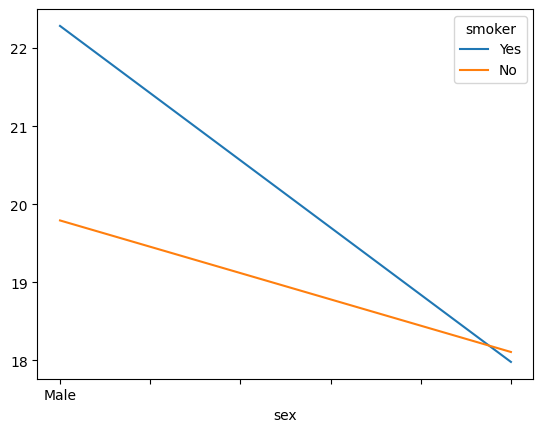

In [ ]:
#plotting the pivot table for generating the insights in the relationship between 2 tables.
'''
below from the table, we can infer that avg total bills of males is greater than that of females no matter they are smoking or
not smoking.
'''
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='mean').plot()